In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
from matplotlib.patches import Polygon

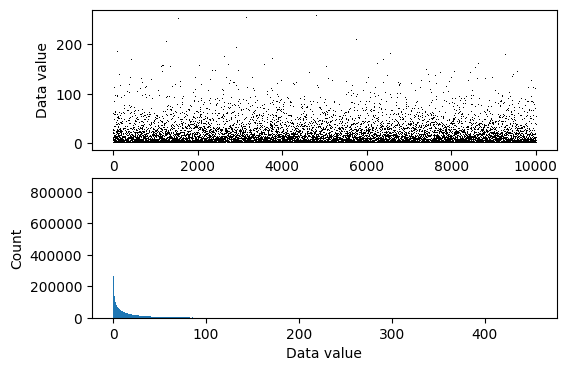

In [3]:
## simulate data

popN = int(1e7) # lots and LOTS of data!

# the data (note: non-normal)
population = (4*np.random.randn(popN))**2

popMean = np.mean(population)

# Let's see it
fig,ax =plt.subplots(2,1,figsize=(6,4))

# only plot every 1000th sample
ax[0].plot(population[::1000],'k,')
ax[0].set_xlabel('Data index')
ax[0].set_ylabel('Data value')

ax[1].hist(population,bins='fd')
ax[1].set_ylabel('Count')
ax[1].set_xlabel('Data value')
plt.show()

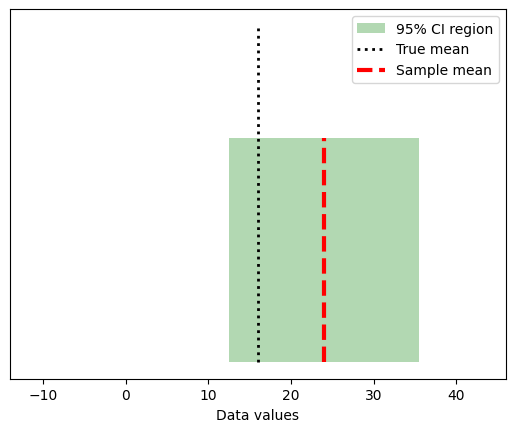

In [68]:
## draw a random sample

# parameters
samplesize = 40
confidence = 95 # in percent

# compute sample mean
randSamples = np.random.randint(0,popN,samplesize)
samplemean = np.mean(population[randSamples])
samplestd = np.std(population[randSamples],ddof=1)

# compute confidence intervals
citmp = (1-confidence/100)/2
# 신뢰 구간의 하한과 상한 계산: citmp -> 0.025, 1-citmp -> 0.975
# ppf는 T 분포의 역함수 (누적분포함수 CDF의 역함수)
confint = samplemean+stats.t.ppf([citmp,1-citmp],samplesize-1)*samplestd/np.sqrt(samplesize)

# graph everything 
fig,ax = plt.subplots(1,1)

y = np.array([[confint[0],0],[confint[1],0],[confint[1],1],[confint[0],1]])
p = Polygon(y,facecolor='g',alpha=.3)
ax.add_patch(p)

# now add the lines
ax.plot([popMean,popMean],[0,1.5],'k:',linewidth=2)
ax.plot([samplemean,samplemean],[0,1],'r--',linewidth=3)
ax.set_xlim([popMean-30,popMean+30])
ax.set_yticks([])
ax.set_xlabel('Data values')
ax.legend(('%g%% CI region'%confidence,'True mean','Sample mean'))
plt.show()
# 신뢰 구간은 참된 평균이 샘플 평균과 신뢰구간 내에 있을 것을 보장하지는 않는다.
# 신뢰 구간은 샘플 평균 추정에 대한 우리의 신뢰도를 나타내는것
# 이 실험을 여러번 반복하면 대략 95%의 경우에 참된 평균이 샘플 평균과 신뢰구간 내 있을 거라는 의미
# 실행할때마다 구간의 폭이 변하는 이유는 표준편차 실행할떄마 달라지 때문 -> 때때로 큰 변동성, 때때로 작은 변동성
# 해당 표본을 사용하 계산한 평균에 대 우리가 얼마 신뢰할수 있는지를 나타냄

In [64]:
## repeat for large number of samples

# parameters
samplesize = 50
confidence = 95
numExperiments = 5000

withinCI = np.zeros(numExperiments)

# part of the CI computatuion can be done outside the loop
citmp = (1-confidence/100)/2
CI_T = stats.t.ppf([citmp,1-citmp],samplemean-1)
sqrtN = np.sqrt(samplesize)

for expi in range(numExperiments):

    # compute sample mean and CI as above 
    randSamples = np.random.randint(0,popN,samplesize)
    samplemean = np.mean(population[randSamples])
    samplestd = np.std(population[randSamples],ddof=1)
    confint = samplemean+CI_T *samplestd/sqrtN

    # determine whether the True mean is inside this CI
    if popMean>confint[0] and popMean<confint[1]:
        withinCI[expi] = 1

print('%g%% of sample C.I.''s contained the true popluation mean.'%(100*np.mean(withinCI)))

93.74% of sample C.I.s contained the true popluation mean.


In [66]:
print(CI_T)

[-2.1378975  2.1378975]
